In [111]:
import pandas as pd

#### 1.Data Processing

In [112]:
# a) Import the data: shape should be (30000,24)
data=pd.read_excel('default of credit card clients.xls')

In [113]:
data=data.drop(columns=['Unnamed: 0'])

In [114]:
data.shape

(30000, 24)

In [115]:
# b) Remove any rows that have missing data.
data=data.dropna()

In [116]:
# c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 
# d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['default payment next month']), data['default payment next month'], test_size = 0.3, random_state = 101)

#### 2. Random Forest Classifier - Base Model

In [117]:
# a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [118]:
# b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred_rf = rnd_clf.predict(X_test)
y_pred_proba_rf=rnd_clf.predict_proba(X_test)

In [119]:
# c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[6654,  404],
       [1243,  699]])

In [120]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.63      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



In [121]:
# d) Calculate the roc_auc_score for this model on testing data.
from sklearn.metrics import roc_auc_score

In [122]:
# calculate roc_auc_score
roc_auc_score(y_test, y_pred_proba_rf[:,1])

#Question:
# Why y_pred_proba_rf[:,1]? 

0.7625067886825039

In [123]:
# e) Calculate predictions for the training data & build the classification report & roc_auc_score
y_pred_rf_train = rnd_clf.predict(X_train)
y_pred_proba_rf_train =rnd_clf.predict_proba(X_train)

In [124]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_rf_train)

array([[16303,     3],
       [    6,  4688]])

In [125]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16306
           1       1.00      1.00      1.00      4694

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [126]:
# Calculate the roc_auc_score for this model on training data.
roc_auc_score(y_train, y_pred_proba_rf_train[:,1])

0.9999981643672351

The Model is showing a sign of overfitting since the accuracy between training data and testing data are huge. 
Also the AUC score between testing and training data set are huge too, the accuracy on training =1 and AUC =1 shows the low bias and high variance of the model(Overfitting).

#### 3. Random Forest Classifier - Grid Search:

In [127]:
# a) Use the RandomForestClassifier along with the GridSearchCV tool
from sklearn.model_selection import GridSearchCV
#create a dictionary of parameters 
param_grid = {'n_estimators':[50, 100, 500],
'max_features': [2, 4, 6],
'max_depth':[6, 8, 10, 12]}

# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)
# Fit the GridSearch
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [128]:
# b) Identify the best performing model:
rf_Grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 500}

In [129]:
best_model=rf_Grid.best_estimator_

In [130]:
#c) Use the best estimator model to predict on test data.
y_pred_rf_Grid = best_model.predict(X_test)
y_pred_proba_rf_Grid=best_model.predict_proba(X_test)

In [131]:
# d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf_Grid)

array([[6746,  312],
       [1259,  683]])

In [132]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_Grid))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [133]:
# e) Calculate the roc_auc_score for this model.
roc_auc_score(y_test, y_pred_proba_rf_Grid[:,1])

0.7783296353678614

In [134]:
# f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
y_pred_rf_train_Grid = best_model.predict(X_train)
y_pred_proba_rf_train_Grid =best_model.predict_proba(X_train)

In [135]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_rf_train_Grid)

array([[15901,   405],
       [ 2611,  2083]])

In [136]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_rf_train_Grid))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     16306
           1       0.84      0.44      0.58      4694

    accuracy                           0.86     21000
   macro avg       0.85      0.71      0.75     21000
weighted avg       0.85      0.86      0.84     21000



In [137]:
# Calculate the roc_auc_score for this model on training data.
roc_auc_score(y_train, y_pred_proba_rf_train_Grid[:,1])

0.8638387779289893

No, the result after the grid search shows does not a sign of overfitting.
The weighted avg accuracy for training is 0.85 while yhe weighted avg accuracy for testing is 0.81. The gap is not that obvious compare to the Model #2 results, it does not show a trend/sign of overfitting since we see a tiny little drop after apply model on testing dataset. 

The AUC score on training 0.866 while on testing is 0.7788, This drive the same result that it does not shows a sign of overfitting.



#### 4. Create a feature importance plot for your best performing model.

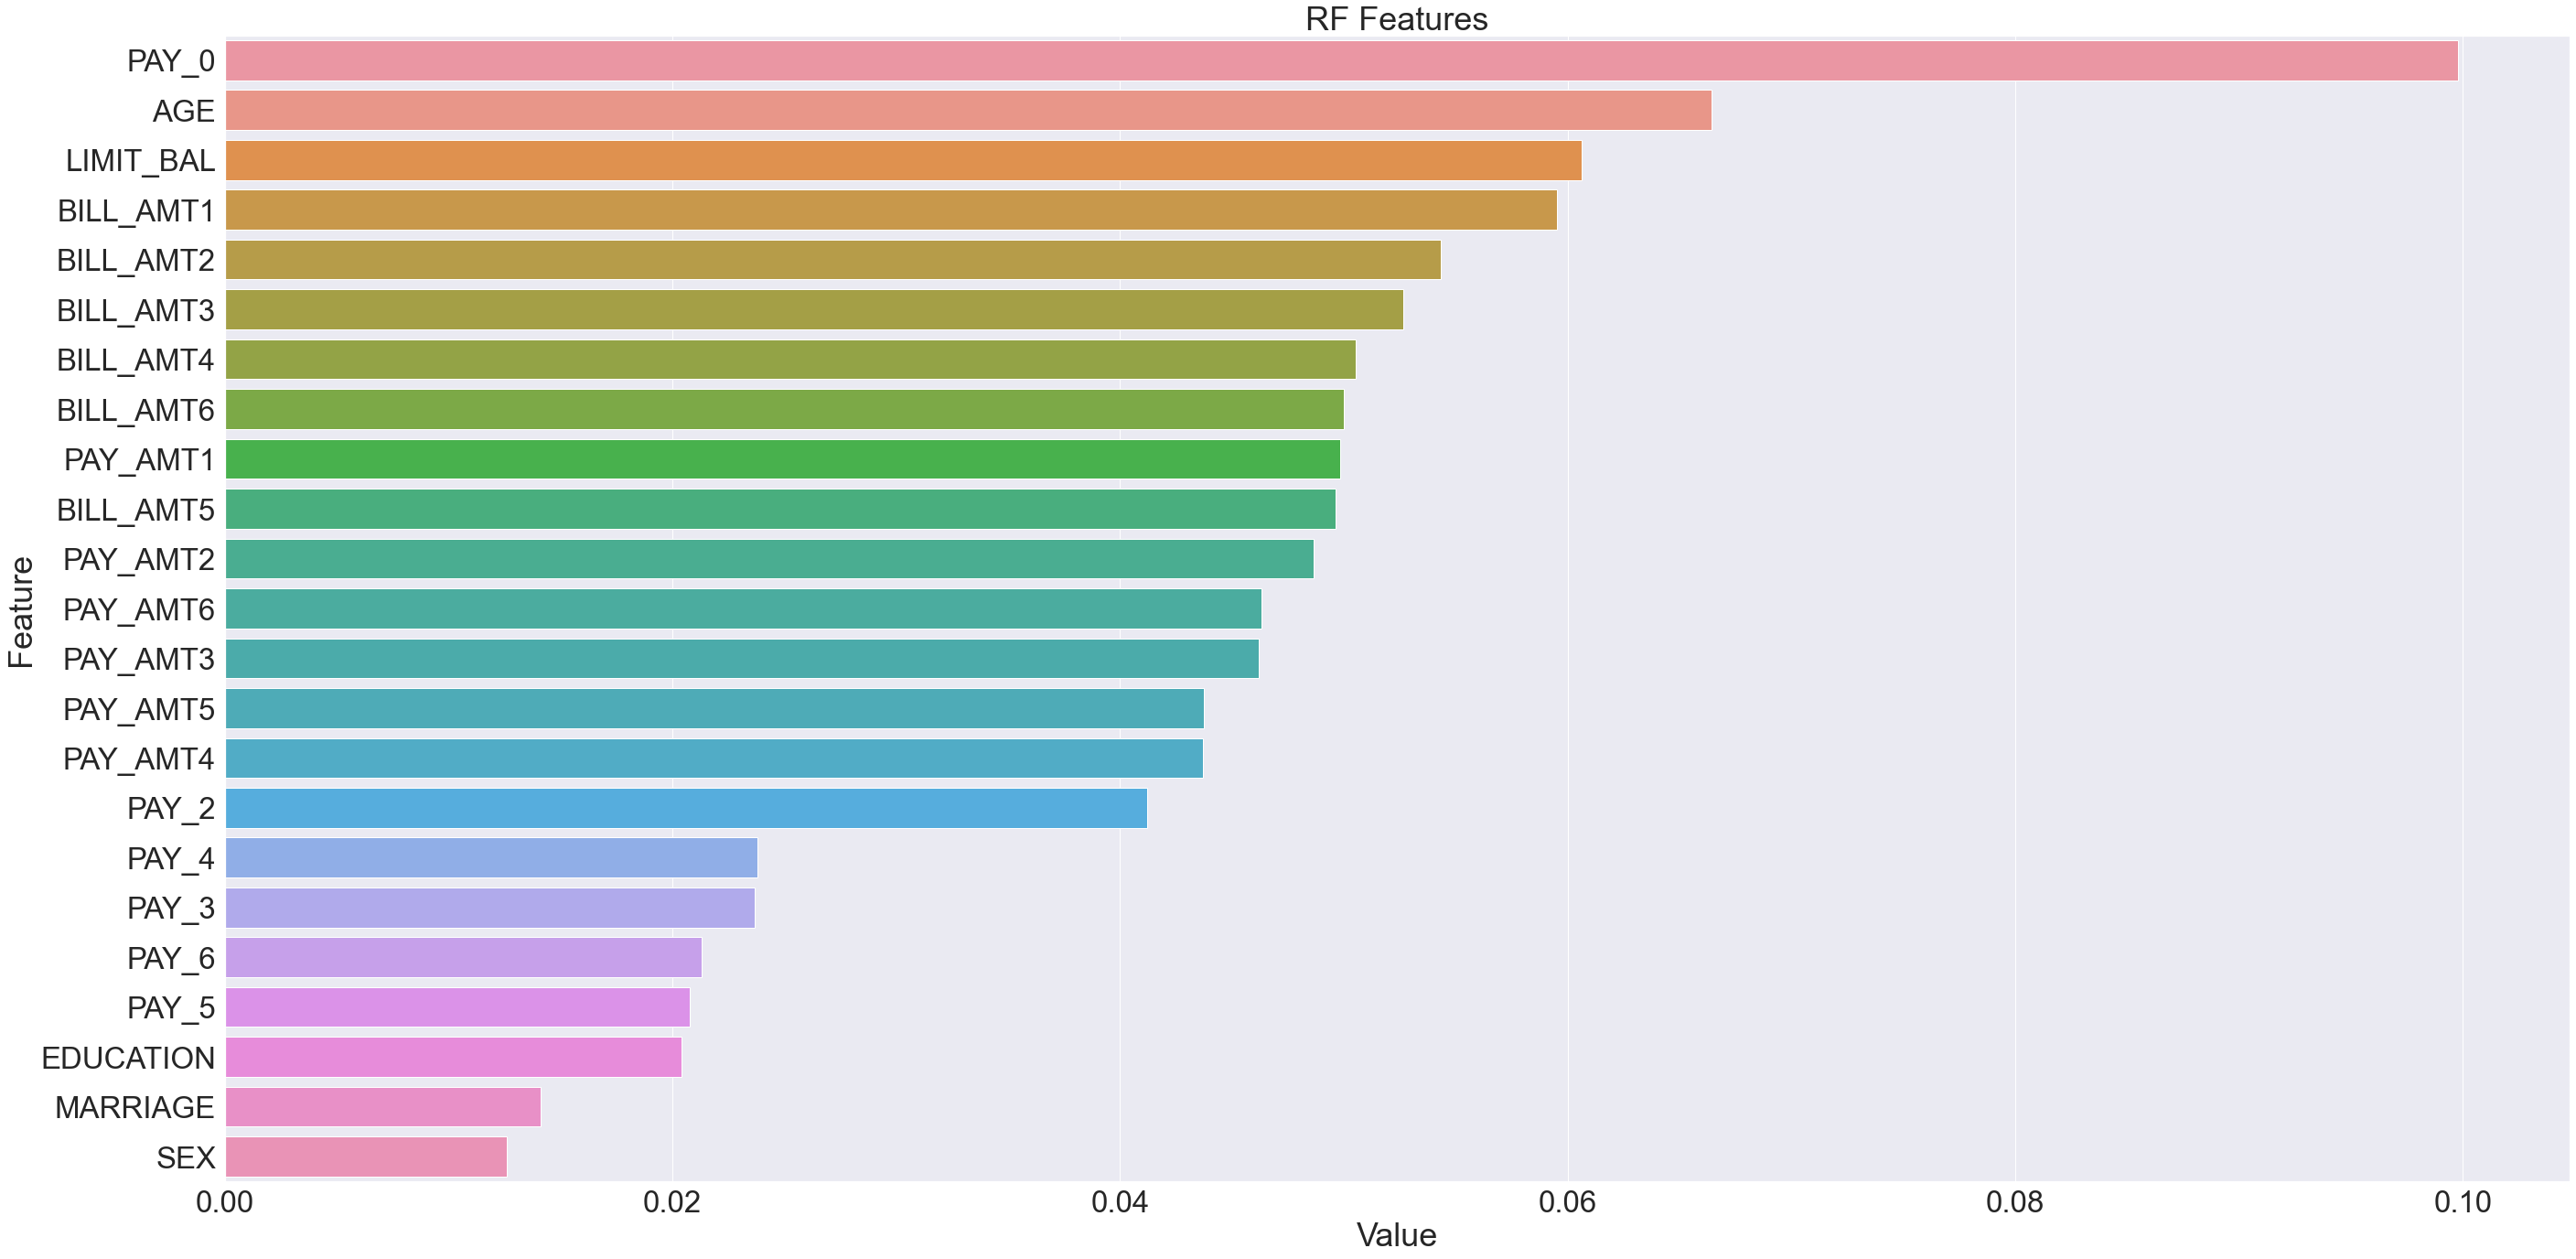

In [138]:
# What are the top 5 features for this model?
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame({'Value':rnd_clf.feature_importances_,'Feature':X_train.columns})
plt.figure(figsize=(40, 20))
sns.set(font_scale = 3)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:50])
plt.title('RF Features')
plt.tight_layout()
plt.show()


# The top 5 features are PAY_0,AGE,LIMIT_BAL,BILL_AMT1,BILL_AMT2

In [139]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 5. Conceptual Questions:

###### a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2?
bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False
{'max_depth': 10, 'max_features': 6, 'n_estimators': 500}
is the best parameters from the Grid Search in Question # 3.

The accuracy for testing data on Model #2 is 0.8 and the accuracy for testing data on Model #3 is also 0.81. Thus I do not think Model from #3 outperform Model #2.
While I do not think it is the general care for all models after grid search, if give grid search more selertions of hyper parameter, the result might be different.

###### b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? 
For Model #3,the weighted avg accuracy for training is 0.85 while the weighted avg accuracy for testing is 0.81. Those are not the sign of overfitting since the accuracy between training data and testing data are very close, I do not see a significant drop when I applied the model on the testing data set.
For Model #2, the weighted avg accuracy for training is 1.0 while the weighted avg accuracy for testing is 0.8. 
The Model is showing a sign of overfitting since the accuracy between training data and testing data are huge. 

Model #3 overfit data way less than Model #2.

###### c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work?

The Gini Index is calculated by subtracting the sum of the squared probabilities of each class from one.  It favors larger partitions.

###### d) Describe how Random Forest is different from bagging & why this difference can yield improved results.
The fundamental difference between bagging and random forest is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

By selecting only part of the whole features consiered for each node for split,it help creating multiple different models from a single training dataset.Creating more tress in the way means decrease the potential bias of the model,thues yield improved results.

###### e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.
max_depth is The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.

By using the default, it will overfit the testing dataset since the model does not know where to stop. It will cause the model to overfit the data, which leads to low bias and high variance. 

Meanwhile, setting a too small max_depth will cause underfitting(high bias and low variance), by seeting a right max_depth will help model to balance the bias and variance.

###### f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 
###### 1) Describe how k-fold cross-validation works. 

###### 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?
It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

It also allow us to made the full use of a relative small data set, by using k-fold cross-validation it basically equal to doing train-test split approach K times on different testing/traing data set group. It help the model to me more accurate.